In [2]:
items = ["dog", "python", "anaconda", "car", "notebook"]
for item in items:
    superString = "Super"
    if len(item) > 4:
        superString = superString + " "
    print(superString + item)


Superdog
Super python
Super anaconda
Supercar
Super notebook


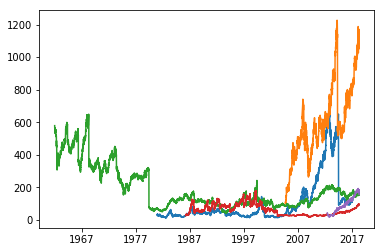

In [20]:
import quandl
import matplotlib.pyplot as plt
import pandas as pd 


stocks = ["AAPL","GOOGL","IBM","MSFT","FB"]
openData = []
for stock in stocks:
    openData.append(quandl.get("WIKI/"+stock, auth_token="-CnJyzAWy8gn8xqUuNWk")["Open"])
dicts = dict(zip(stocks, openData))
dataFrame = pd.DataFrame(dicts)
plt.plot(dataFrame)
plt.show()


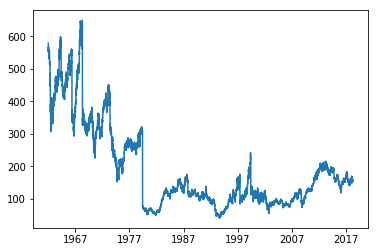

In [21]:
def plotStock(name):
    stock = quandl.get("WIKI/"+name, auth_token="-CnJyzAWy8gn8xqUuNWk")["Open"]
    plt.plot(stock)
    plt.show()
plotStock("IBM")

In [22]:
while(len(stocks)>0):
    stocks.pop(-1)

In [23]:
numList = [5,645,21,54,2,3,455,6665,212,21,32,47,5,6574,12,354,156,78,54,65,12,32,123,23,111,545]
one_digit = []
two_digit = []
three_digit = []
four_digit = []
#math solution
for item in numList:
    if(item//10==0):
        one_digit.append(item)
    elif(item//100==0):
        two_digit.append(item)
    elif(item//1000==0):
        three_digit.append(item)
    elif(item//10000==0):
        four_digit.append(item)
print(one_digit)
print(two_digit)
print(three_digit)
print(four_digit)

one_digit = []
two_digit = []
three_digit = []
four_digit = []

for item in numList:
    length = len(str(item))
    if(length==1):
        one_digit.append(item)
    elif(length==2):
        two_digit.append(item)
    elif(length==3):
        three_digit.append(item)
    elif(length==4):
        four_digit.append(item)
        
        
print(one_digit)
print(two_digit)
print(three_digit)
print(four_digit)


[5, 2, 3, 5]
[21, 54, 21, 32, 47, 12, 78, 54, 65, 12, 32, 23]
[645, 455, 212, 354, 156, 123, 111, 545]
[6665, 6574]
[5, 2, 3, 5]
[21, 54, 21, 32, 47, 12, 78, 54, 65, 12, 32, 23]
[645, 455, 212, 354, 156, 123, 111, 545]
[6665, 6574]


In [24]:
items = ["dog", "python", "anaconda", "car", "notebook"]
i = 0
while( i < len(items)):
    item = items[i]
    superString = "Super"
    if len(item) > 4:
        superString = superString + " "
    print(superString + item)
    i = i+1

Superdog
Super python
Super anaconda
Supercar
Super notebook


In [80]:
import quandl

unemployment = quandl.get("FRED/SLUEM1524ZSARM", auth_token="-CnJyzAWy8gn8xqUuNWk")
medPropertyPrice = quandl.get("ZILLOW/C25499_MLPFAH", auth_token="-CnJyzAWy8gn8xqUuNWk")

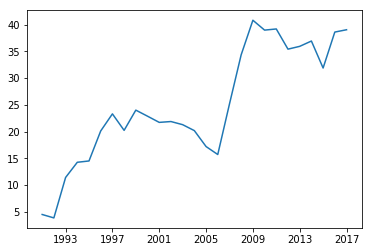

                Value
Date                 
2001-01-01  21.724001
                Value
Date                 
2009-01-01  40.818001


In [48]:
import matplotlib.pyplot as plt
plt.plot(unemployment["Value"])
plt.show()
print(unemployment["2001"])
print(unemployment.sort_values(by='Value').tail(1))


In [33]:
import numpy as np #math functions
print("Median: " + str(np.median(unemployment["Value"])))
print("Mean: " + str(np.mean(unemployment["Value"])))
(values,counts) = np.unique(unemployment["Value"],return_counts=True)
ind=np.argmax(counts)
print("Mode: " + str(values[ind])) 

Median: 22.8819999695
Mean: 24.942814853449633
Mode: 3.86599993706


In [38]:
medPropertyPrice.groupby(pd.cut(medPropertyPrice["Value"],[160,170])).count()

,Value
Value,
"(160, 170]",13


Text(0.5,1,'Median price count')

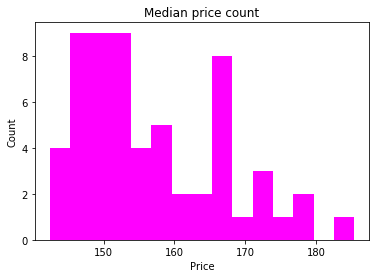

In [57]:
plt.hist(medPropertyPrice["Value"], bins=15, color="magenta")
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Median price count")

In [76]:
def priceRange(x):
    if x["Value"] <= 160:
        return "Low"
    if x["Value"] <= 170:
        return "Medium"
    return "High"

In [81]:
medPropertyPrice["Classification"] = medPropertyPrice.apply (lambda row: priceRange (row),axis=1)
print(medPropertyPrice)

                 Value Classification
Date                                 
2013-04-30  178.571429           High
2013-05-31  178.571429           High
2013-06-30  185.380865           High
2013-07-31  176.747442           High
2013-08-31  166.666667         Medium
2013-09-30  167.599502         Medium
2013-10-31  169.025157         Medium
2013-11-30  160.929092         Medium
2013-12-31  165.282392         Medium
2014-01-31  167.153775         Medium
2014-02-28  166.666667         Medium
2014-03-31  172.686604           High
2014-04-30  172.207447           High
2014-05-31  161.466408         Medium
2014-06-30  156.976744            Low
2014-07-31  142.410714            Low
2014-08-31  144.152523            Low
2014-09-30  145.656780            Low
2014-10-31  150.291745            Low
2014-11-30  152.343542            Low
2014-12-31  152.343542            Low
2015-01-31  150.387968            Low
2015-02-28  154.441006            Low
2015-03-31  157.130952            Low
2015-04-30  

In [83]:
pd.pivot_table(medPropertyPrice, values=["Value"] ,index=["Classification"],aggfunc='median')

,Value
Classification,
High,176.747442
Low,150.615718
Medium,166.272727
